# Tutorial 1: Part 2

Objectives:
- Learn how to define a simple lattice and compute the TWISS functions using MAD-X.
- Thick vs thin lense approximation TWISS comparison for a lattice with only quadrupoles.
- Tune and $\beta$-function dependence on K1.

**My first accelerator: a FODO cell**

1. Make a simple lattice FODO cell with:
    - $L_{cell}$= 100 m.
    - Focusing and defocusing quadrupoles of 5 m long ($L_{quad}$). 
    - Put the start of the first qudrupole at the start of the sequence. 
    - Each quadrupole has a focal length f = 200 m (HINT: k1 x $L_{quad}$ = 1/f).


2. Define a proton beam at $E_{tot}$= 2 GeV. Activate the sequence and try to find the periodic solution and plot the $\beta$-functions. 


3. Using the plot you obtained can you estimate the phase advance of the cell. Compare with the tunes obtained with the TWISS.

**Matching the FODO cell using a parametric plot**

4. Try to twiss it powering the quadrupoles to obtain a $\Delta \mu \approx 90^\circ$ in the cell using the thin lense approximation (HINT: using the figures from Tutorial 1: Part 1). What is the actual phase advance computed by MAD-X?

**BONUS:**

5. What is the $\beta_{max}$? Compare with the thin lense approximation (HINT: using the figures from Tutorial 1: Part 1).


6. Halve the focusing strength of the quadrupoles, what is the effect of it on the $\beta_{max}$ and $\beta_{min}$ and on the $\Delta \mu$? Compare with the parametric plots.


7. Compute the maximum beam size $\sigma$ assuming a normalized emittance of 3 mrad mm and $E_{tot}= 7 TeV$.


8. Try with $E_{tot}$ = 0.7 GeV: what is the MAD-X error message?


9. Try with f = 20 m: what is the MAD-x error message?

In [1]:
#Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from cpymad.madx import Madx 

# Launching MAD-X

In [19]:
#If you don't see  the MAD-X output printed in the jupyter notebook try myMad = Madx().
myMad = Madx(stdout=True)

1. Make a simple lattice FODO cell with:
    - $L_{cell}$= 100 m.
    - Focusing and defocusing quadrupoles of 5 m long ($L_{quad}$). 
    - Put the start of the first qudrupole at the start of the sequence. 
    - Each quadrupole has a focal length f = 200 m (HINT: k1 x $L_{quad}$ = 1/f).

<div>
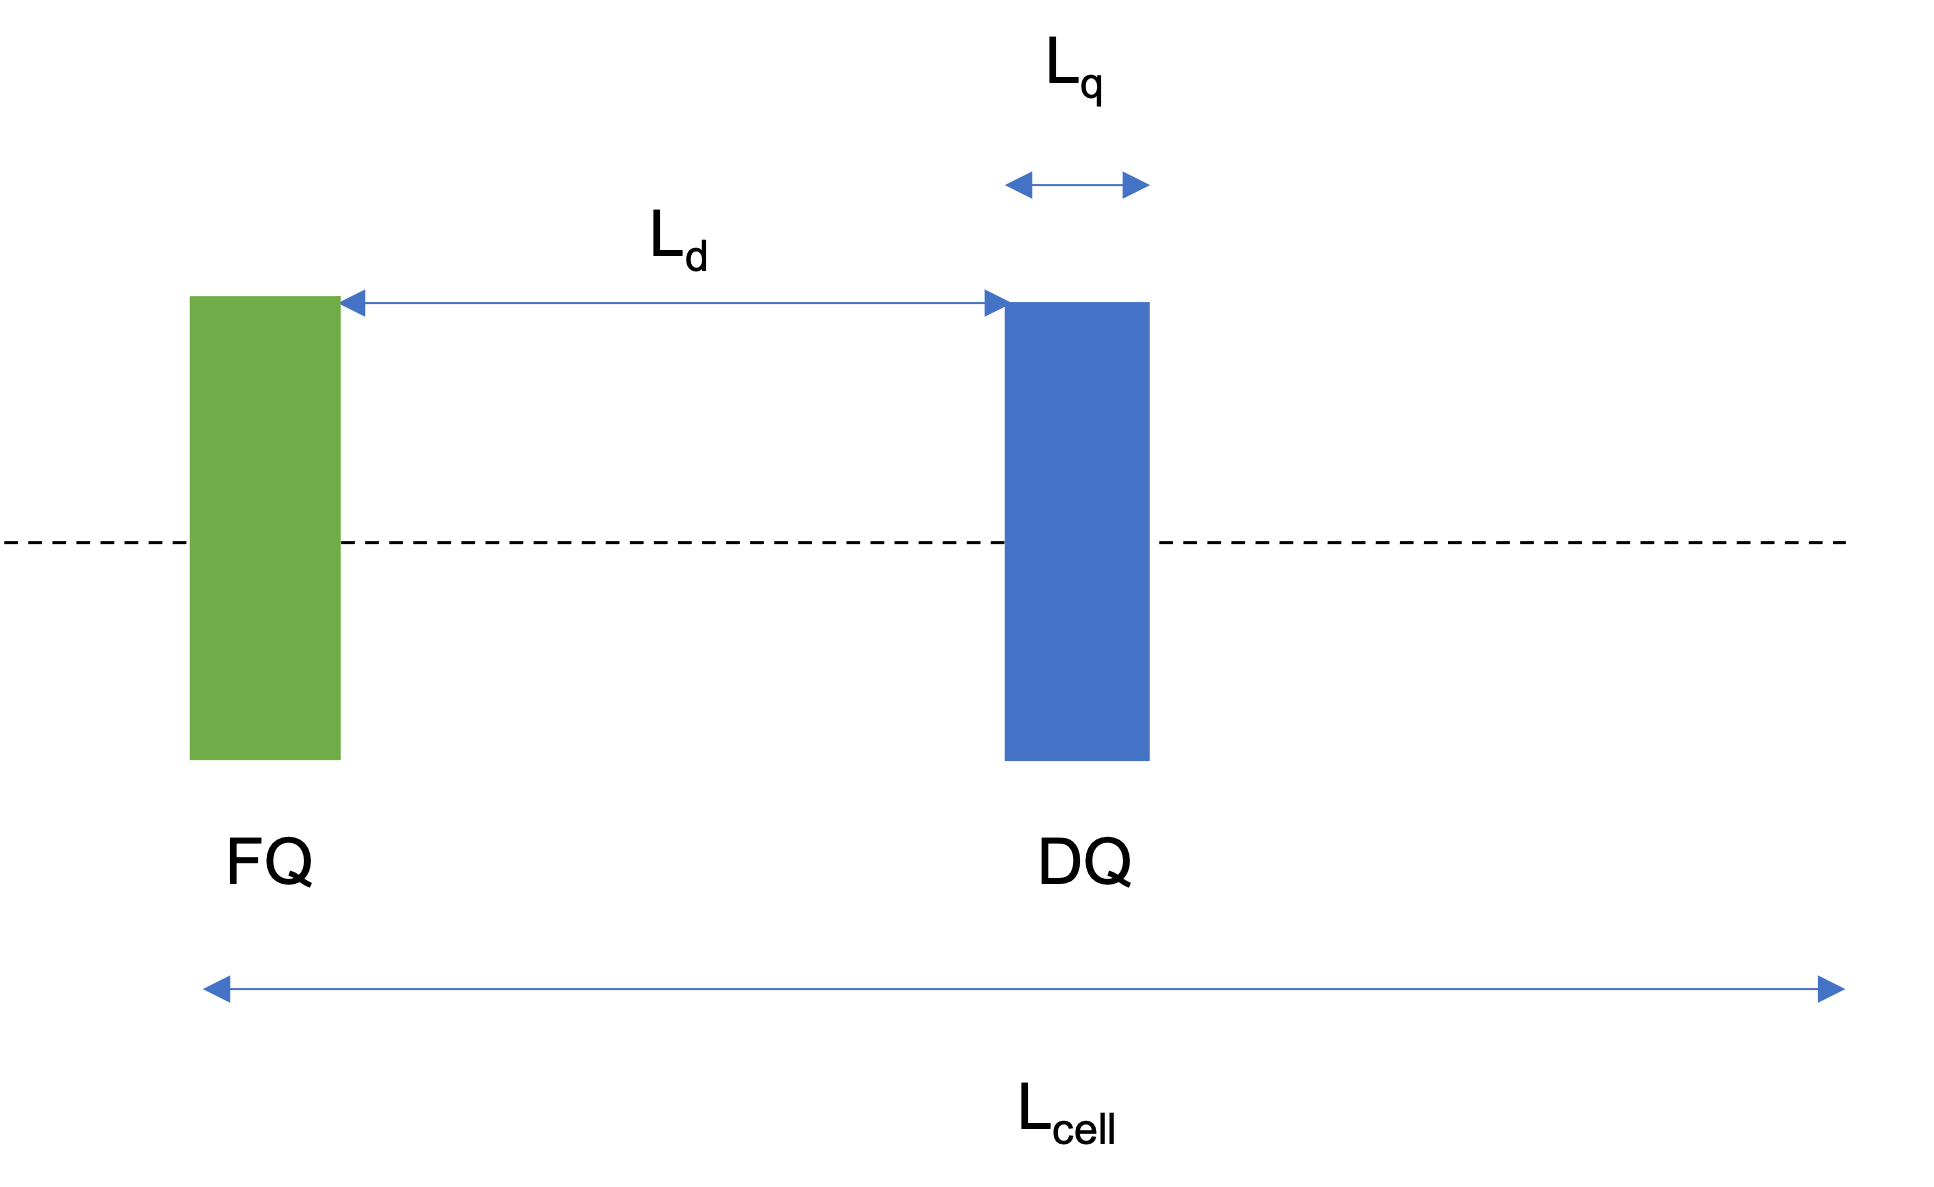
</div>

2. Define a proton beam at $E_{tot}$= 2 GeV. Activate the sequence and try to find the periodic solution and plot the $\beta$-functions. 

In [ ]:
# In this template you need to substitute the ?? marks by the corresponding numbers.
myString='''
! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell=??;
quadrupoleLenght=??;
myK:=??;// m^-2

! *********************************************************************
! Definition of magnets
! ********************************************************************* 
QF: quadrupole, L=??, K1=??;
QD: quadrupole, L=??, K1=??;

! *********************************************************************
! Definition of sequence
! *********************************************************************

mycell:sequence, refer=entry, L=??;
quad1: QF, at=??;
quad2: QD, at=??;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=??, energy=??;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=mycell;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, file=MyfirstFODO.madx;

! In case you want to generate the MAD-X plot uncomment the following line
plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="test",file=MyfirstFODO;

'''
myMad.input(myString);

In [ ]:
#############################################################
# Extract information from SUMM table using MADX commands   #
#############################################################
myString='''
value, table(SUMM,Q1);
value, table(SUMM,betymax);
'''
myMad.input(myString);

And for the vertical plane?

In [ ]:
#############################################################
# Extract information from SUMM table using python commands #
#############################################################
# SUMM table
myDF=myMad.table.summ.dframe()
myDF
myDF["q1"]

In [ ]:
##############################################################
# Extract information from TWISS table using python commands #
##############################################################
# TWISS table
myDF=myMad.table.twiss.dframe()
myDF[['name','s','betx','bety','alfx','alfy','mux','muy']]

In [ ]:
############################
# Plot with python example #
############################
%matplotlib notebook
plt.plot(myDF['s'],myDF['betx'],'.-b',label='$\\beta_x$')
plt.plot(myDF['s'],myDF['bety'],'.-r',label='$\\beta_y$')
plt.legend()
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.title('My first FODO cell')

If you found $\beta_{max}$= 463.6 m you succeded!

# Tune from the plot
3. Using the plot you obtained can you estimate the phase advance of the cell. Compare with the tunes obtained with the TWISS.

Remember that the unit of phase in MAD-X is [2$\pi$].

In [1]:
# Phase advance from the beta-function plot

In [12]:
# Phase advance from the MAD-X TWISS

# **Matching the FODO cell using a parametric plot**
4. Try to twiss your FODO powering the quadrupoles to obtain a $\Delta \mu \approx 90^\circ$ in the cell using the thin lense approximation (HINT: using the figures from Tutorial 1: Part 1). What is the actual phase advance computed by MAD-X?

In [110]:
myMad = Madx(stdout=True)

In [3]:
# From the plot from Tutoria 1 - Part 1 you can get the K needed for a 90 degrees phase advance

In [112]:
# Here you can copy and paste the MAD-X script completed before and modify only the quadrupoles strength
myString='''
! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell=??;
quadrupoleLenght=??;
myK:=??;// m^-2

! *********************************************************************
! Definition of magnets
! ********************************************************************* 
QF: quadrupole, L=??, K1=??;
QD: quadrupole, L=??, K1=??;

! *********************************************************************
! Definition of sequence
! *********************************************************************

mycell:sequence, refer=entry, L=??;
q1: QF, at=??;
q2: QD, at=??;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=??, energy=??;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=??;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, file=MyfirstFODO.madx;

! In case you want to generate the MAD-X plot
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="test",file=MyfirstFODO;

'''
myMad.input(myString);

In [114]:
##############################################################
# Extract information from TWISS table using python commands #
##############################################################
myDF2=myMad.table.twiss.dframe()
myDF2[['name','s','betx','bety','alfx','alfy','mux','muy']]

In [7]:
#Phase advance computed by MAD-X in rad


In [8]:
#Phase advance computed by MAD-X in degrees


**BONUS:**

5. What is the $\beta_{max}$? Compare with the thin lense approximation (using the figures from Tutorial 1: Part 1).

In [4]:
# From the MAD-X calculation


In [5]:
#From the parametric plot Figure 2 


6. Halve the focusing strength of the quadrupoles, what is the effect of it on the $\beta_{max}$ and $\beta_{min}$ and on the $\Delta \mu$? Compare with the parametric plots.

In [122]:
myString='''

myK:=??;// m^-2
twiss, file=thirdTwiss.txt;

'''
myMad.input(myString);

In [123]:
#####################################################################
# Extract information from SUMM table using python or MADX commands #
#####################################################################

In [ ]:
myDF3=myMad.table.twiss.dframe()
myDF3['betx']

In [9]:
# bmax from parametric plots


In [13]:
# Value from MADX


7. Compute the maximum beam size $\sigma$ assuming a normalized emittance of 3 mrad mm and $E_{tot}= 7 TeV$.

# Varying the energy
8. Try with $E_{tot}$ = 0.7 GeV: what is the MAD-X error message? 

In [ ]:
# With this simple wrapper in case of error the code enter in an infinite loop you have to stop manually.
myString='''

beam, particle=??, energy=??;

twiss;

'''
myMad.input(myString);

# With f=20 m
9. Try with f= 20 m: what is the MAD-x error message?

In [108]:
#As MAD-X has stopped you need to re-start it!
myMad = Madx(stdout=True)

In [109]:
# You can copy and paste your previous string with the machine description you completed and just modify the focal lenght.
myString='''
! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell=??;
quadrupoleLenght=??;
myK:=??;// m^-2

! *********************************************************************
! Definition of magnets
! ********************************************************************* 
QF: quadrupole, L=??, K1=??;
QD: quadrupole, L=??, K1=??;

! *********************************************************************
! Definition of sequence
! *********************************************************************

mycell:sequence, refer=entry, L=??;
q1: QF, at=??;
q2: QD, at=??;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=??, energy=??;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=??;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, file=MysecondFODO.madx;

! In case you want to generate the MAD-X plot
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="test",file=MysecondFODO;

'''
myMad.input(myString);